In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
# Define the paths to the image folders
goal_folder = '/content/drive/MyDrive/Datasets MLAI/Football/Goal'
notgoal_folder = '/content/drive/MyDrive/Datasets MLAI/Football/NotGoal'

In [ ]:
# Define the target size for resizing
target_size = (100, 100)

In [ ]:
# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.png'):
            # Read the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Convert the image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize the image
            resized_img = cv2.resize(gray_img, target_size)

            # Append the image and label to the lists
            images.append(resized_img)
            labels.append(label)

    return images, labels


In [ ]:
# Load and preprocess goal images (label: 1)
goal_images, goal_labels = load_and_preprocess_images(goal_folder, 1)

100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


In [ ]:
# Load and preprocess notgoal images (label: 0)
notgoal_images, notgoal_labels = load_and_preprocess_images(notgoal_folder, 0)

100%|██████████| 131/131 [00:04<00:00, 29.88it/s]


In [ ]:
# Merge the lists
all_images = goal_images + notgoal_images
all_labels = goal_labels + notgoal_labels

In [ ]:
# Convert lists to numpy arrays
x = np.array(all_images)
y = np.array(all_labels)

In [ ]:
# Shuffle the data (if needed)
shuffle_indices = np.arange(x.shape[0])
np.random.shuffle(shuffle_indices)

x = x[shuffle_indices]
y = y[shuffle_indices]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
# Convert labels to categorical by encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [ ]:
# Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
model.add(layers.Dense(2, activation='softmax'))  # Output layer with 2 units for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
4/4 [==============================] - 4s 517ms/step - loss: 8.2491 - accuracy: 0.8462 - val_loss: 0.8020 - val_accuracy: 0.6923
Epoch 2/100
4/4 [==============================] - 2s 417ms/step - loss: 3.4080 - accuracy: 0.7115 - val_loss: 1.0503 - val_accuracy: 0.8846
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.8149 - accuracy: 0.7788 - val_loss: 0.4827 - val_accuracy: 0.8846
Epoch 4/100
4/4 [==============================] - 2s 442ms/step - loss: 0.3961 - accuracy: 0.9135 - val_loss: 0.2202 - val_accuracy: 0.8846
Epoch 5/100
4/4 [==============================] - 2s 390ms/step - loss: 0.2055 - accuracy: 0.9231 - val_loss: 0.3024 - val_accuracy: 0.8846
Epoch 6/100
4/4 [==============================] - 2s 412ms/step - loss: 0.1579 - accuracy: 0.9423 - val_loss: 0.1935 - val_accuracy: 0.8846
Epoch 7/100
4/4 [==============================] - 2s 415ms/step - loss: 0.1126 - accuracy: 0.9712 - val_loss: 0.1770 - val_accuracy: 0.8846
Epoch 8/100
4/4 

In [ ]:
import pickle
with open('model_goaldetection.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Save model architecture to a JSON file
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights to a HDF5 file
model.save_weights('model_weights.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 0s 77ms/step - loss: 0.5750 - accuracy: 0.9333
Test Accuracy: 0.9333333373069763


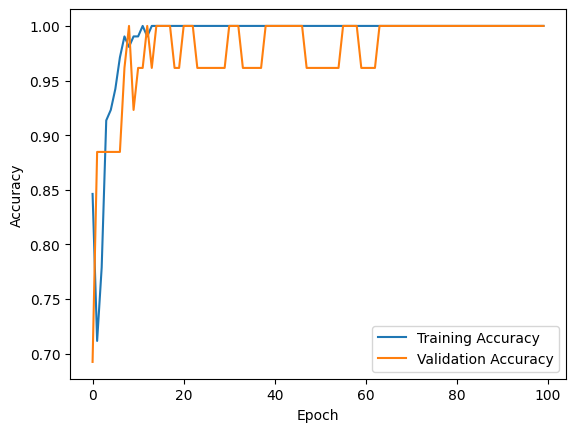

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
new_image_path1 ='/content/drive/MyDrive/Datasets MLAI/Football/12_4.png'

In [ ]:
# Load and preprocess a new image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100, 100))
    return resized_img.reshape((1, 100, 100, 1))

In [ ]:
# Preprocess the image
new_image1 = preprocess_image(new_image_path1)

In [ ]:
# Make predictions using the trained model
predictions = model.predict(new_image1)

1/1 [==============================] - 0s 118ms/step


In [ ]:
new_image_path2='/content/drive/MyDrive/Datasets MLAI/Football/23_1.png'

In [ ]:
# Preprocess the image
new_image2 = preprocess_image(new_image_path2)

In [ ]:
# Make predictions using the trained model
predictions = model.predict(new_image2)

1/1 [==============================] - 0s 27ms/step


In [ ]:
# Interpret the predictions
class_labels = ['NotGoal', 'Goal']
predicted_class = np.argmax(predictions)
print(predicted_class)
print(f'The model predicts that the image is a {class_labels[predicted_class]}')

1
The model predicts that the image is a Goal
